In [56]:
import pandas as pd
import numpy as np


In [57]:
df=pd.read_csv('/content/electrical_power.csv')

In [58]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [59]:
X=df.drop(['PE'],axis=1)

In [60]:
y=df['PE']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=MinMaxScaler(
)

In [64]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [65]:
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [66]:

# model = Sequential([
# Dense(units=8, activation='relu'),
#  Dense(units=8, activation='relu'),
#  Dense(units=1, activation='linear')
# ])

In [67]:
model=Sequential()
model.add(Dense(4,activation='relu',input_dim=4))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))


In [68]:
print(model.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7b08d43bc790>>


In [70]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history=model.fit(X_train, y_train, batch_size=20, epochs=50,validation_split=0.2,)

Epoch 1/50
307/307 [==============================] - 4s 4ms/step - loss: 43112.2500 - accuracy: 0.0000e+00 - val_loss: 1741.0245 - val_accuracy: 0.0000e+00
Epoch 2/50
307/307 [==============================] - 1s 3ms/step - loss: 1585.1782 - accuracy: 0.0000e+00 - val_loss: 1441.5741 - val_accuracy: 0.0000e+00
Epoch 3/50
307/307 [==============================] - 1s 3ms/step - loss: 1308.1381 - accuracy: 0.0000e+00 - val_loss: 1193.6360 - val_accuracy: 0.0000e+00
Epoch 4/50
307/307 [==============================] - 1s 3ms/step - loss: 1095.1384 - accuracy: 0.0000e+00 - val_loss: 997.3320 - val_accuracy: 0.0000e+00
Epoch 5/50
307/307 [==============================] - 1s 4ms/step - loss: 919.1675 - accuracy: 0.0000e+00 - val_loss: 866.7010 - val_accuracy: 0.0000e+00
Epoch 6/50
307/307 [==============================] - 1s 4ms/step - loss: 784.1340 - accuracy: 0.0000e+00 - val_loss: 719.3832 - val_accuracy: 0.0000e+00
Epoch 7/50
307/307 [==============================] - 1s 4ms/step - 

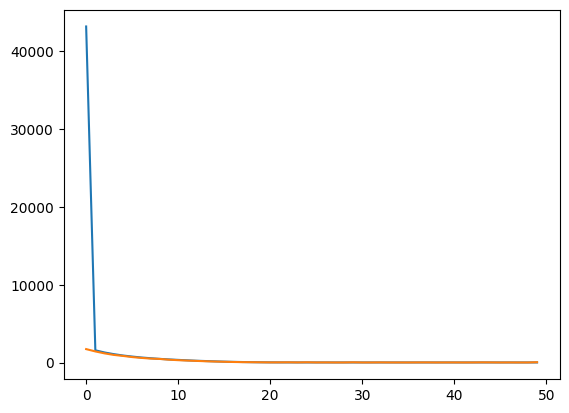

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])